# Iris classification project

In [8]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

Dataset shape: (150, 5)
   sepellength  sepalwidth  petellenght  petalwidth           class
0          7.9         3.8          6.4         2.0  Iris-virginica
1          7.7         3.8          6.7         2.2  Iris-virginica
2          7.7         3.0          6.1         2.3  Iris-virginica
3          7.7         2.8          6.7         2.0  Iris-virginica
4          7.7         2.6          6.9         2.3  Iris-virginica
       sepellength  sepalwidth  petellenght  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000
class
Iris-virginica     50
Iris-versicolor    50
Iris-setosa   

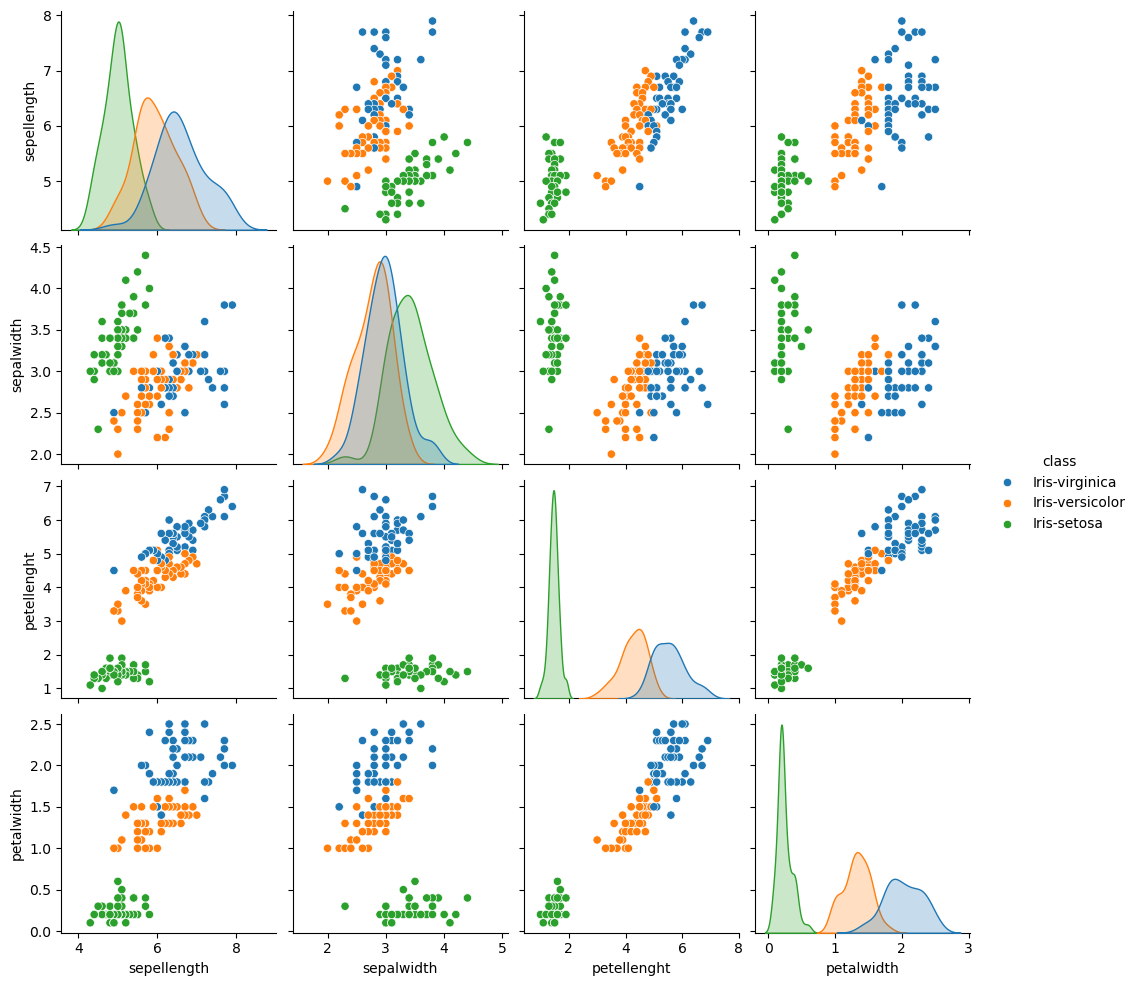

In [9]:

# 2. Load Data

train = pd.read_excel("iris_train.xlsx")
test = pd.read_excel("iris_test.xlsx")
data = pd.concat([train, test], axis=0).reset_index(drop=True)

print("Dataset shape:", data.shape)
print(data.head())


# 3 EDA

print(data.describe())
print(data['class'].value_counts())

sns.pairplot(data, hue="class")
plt.show()

In [16]:
# 4. Preprocessing

X = data.drop("class", axis=1)   # Features
y = data["class"]                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:

# 5. Train Multiple Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))




Decision Tree Results:
Accuracy: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.70      0.82        10

       accuracy                           0.90        30
      macro avg       0.92      0.90      0.90        30
   weighted avg       0.92      0.90      0.90        30


Random Forest Results:
Accuracy: 0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.71      1.00      0.83        10
 Iris-virginica       1.00      0.60      0.75        10

       accuracy                           0.87        30
      macro avg       0.90      0.87      0.86        30
   weighted avg       0.90      0.87      0.86        30


Logistic Regression Results:
Accuracy: 0.9333333333333333
                 precision    recall  f1-score

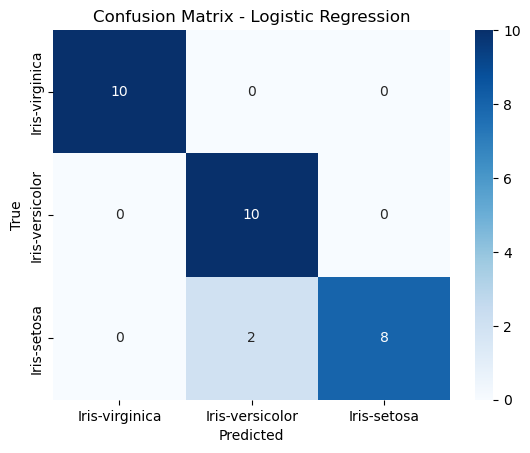

In [12]:
# 6. Confusion Matrix

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [13]:
# 7. Cross-Validation

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"\n{best_model_name} Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")




Logistic Regression Cross-Validation Accuracy: 0.96


In [14]:
# 8. Save & Load Model
joblib.dump(best_model, "iris_model.pkl")
loaded_model = joblib.load("iris_model.pkl")

# Example prediction
sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example measurements
sample_scaled = scaler.transform(sample)
print("Predicted species:", loaded_model.predict(sample_scaled)[0])



Predicted species: Iris-setosa


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:

# 9. Accuracy Comparison

print("\nFinal Model Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.2f}")
    
best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.2f}")


Final Model Accuracies:
Decision Tree: 0.90
Random Forest: 0.87
Logistic Regression: 0.93
KNN: 0.90

 Best Model: Logistic Regression with Accuracy = 0.93
